STAR_DATASET (USING BENFROD'S LAW)

1.INSTALLING ALL LIBRARIES


In [ ]:
!pip install benford_py

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



#READING THE TABLE (ANLYSING THE TABLE )

In [ ]:
df = pd.read_csv('/stars_dataset.csv')
df.head()


,No,Star Name,Equatorial Coordinates,Galactic Longitude,Galactic Latitude,Spectral Type,Visual Magnitude,Absolute Magnitude,Parallax,Error,Distance (ly)
0,1,Alpha Canis Majoris Sirius,06 45 -16.7,227.2,-8.9,A1V,-1.46,1.43,379.21,1.58,9
1,2,Alpha Carinae Canopus,06 24 -52.7,261.2,-25.3,F0Ib,-0.73,-5.64,10.43,0.53,310
2,3,Alpha Centauri Rigil Kentaurus,14 40 -60.8,315.8,-0.7,G2V+K1V,-0.29,4.06,742.12,1.40,4
3,7,Beta Orionis Rigel,05 15 -8.2,209.3,-25.1,B8Ia,0.15v,-6.72v,4.22,0.81,770
4,9,Alpha Eridani Achernar,01 38 -57.2,290.7,-58.8,B3V,0.45,-2.77,22.68,0.57,144


#GRAPHS FOR EACH NUMERICAL DATA

Benford’s Law predicts that in many naturally occurring datasets, the leading digit is more likely to be small (e.g., 1 appears ~30% of the time).
We applied Benford’s Law on the Distance (ly) column.

Observation:

The actual leading-digit distribution deviates from the Benford expectation, likely because the dataset is small and not randomly distributed.

Since star distances are often clustered due to observational limitations or specific catalog ranges, Benford’s Law is not a good fit here.

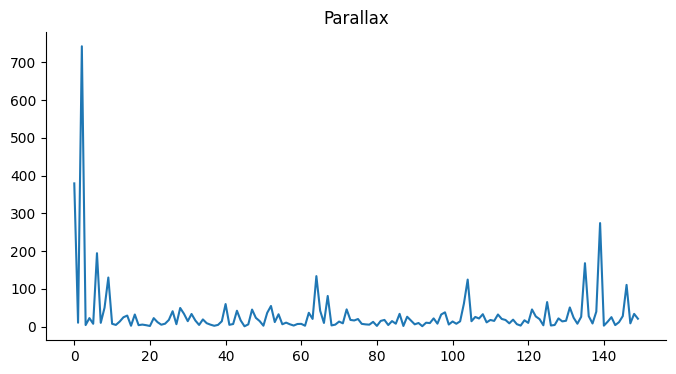

In [ ]:
# @title Parallax

from matplotlib import pyplot as plt
df['Parallax'].plot(kind='line', figsize=(8, 4), title='Parallax')
plt.gca().spines[['top', 'right']].set_visible(False)

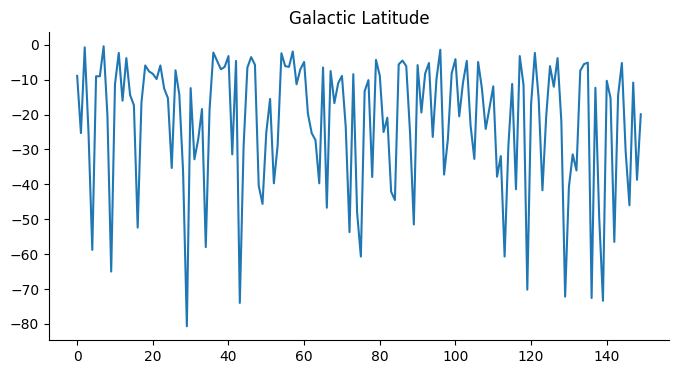

In [ ]:
# @title Galactic Latitude

from matplotlib import pyplot as plt
df['Galactic Latitude'].plot(kind='line', figsize=(8, 4), title='Galactic Latitude')
plt.gca().spines[['top', 'right']].set_visible(False)

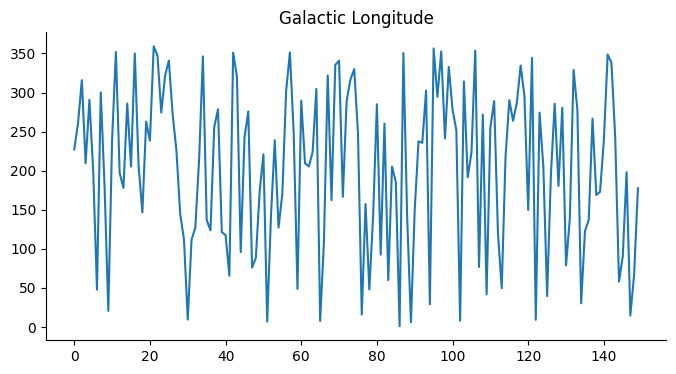

In [ ]:
# @title Galactic Longitude

from matplotlib import pyplot as plt
df['Galactic Longitude'].plot(kind='line', figsize=(8, 4), title='Galactic Longitude')
plt.gca().spines[['top', 'right']].set_visible(False)

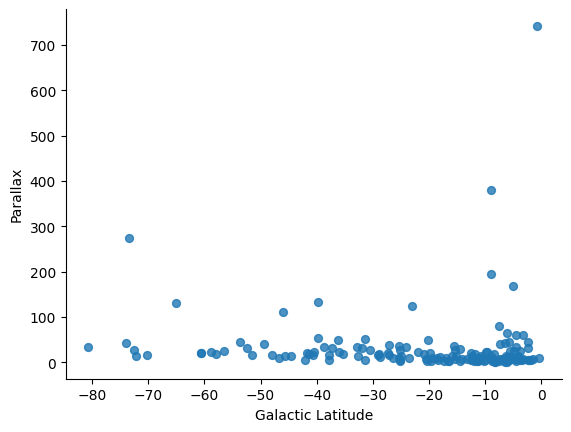

In [ ]:
# @title Galactic Latitude vs Parallax

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Galactic Latitude', y='Parallax', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

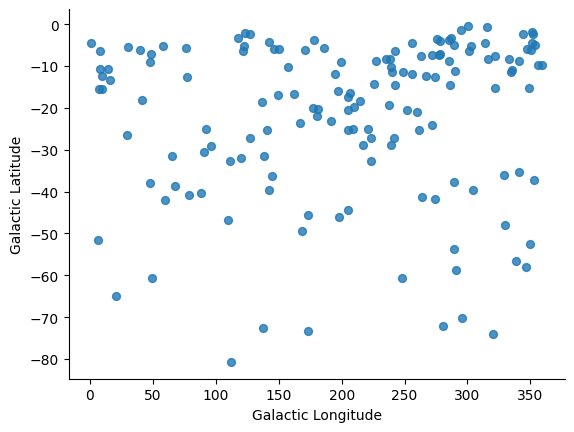

In [ ]:
# @title Galactic Longitude vs Galactic Latitude

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Galactic Longitude', y='Galactic Latitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

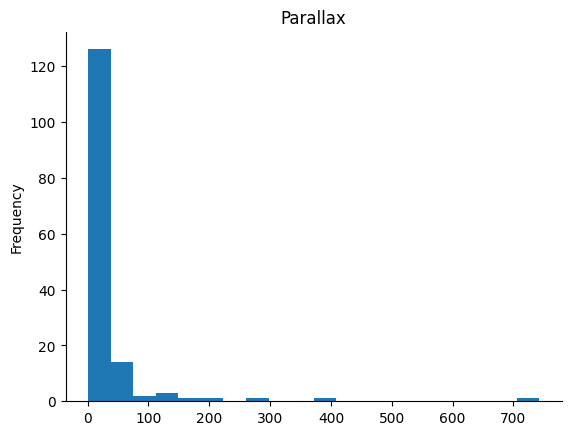

In [ ]:
# @title Parallax

from matplotlib import pyplot as plt
df['Parallax'].plot(kind='hist', bins=20, title='Parallax')
plt.gca().spines[['top', 'right',]].set_visible(False)

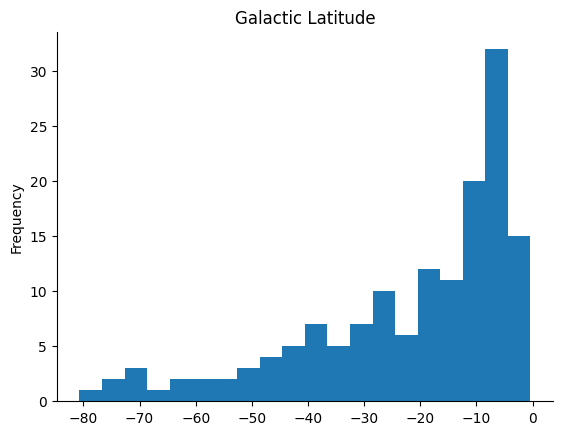

In [ ]:
# @title Galactic Latitude

from matplotlib import pyplot as plt
df['Galactic Latitude'].plot(kind='hist', bins=20, title='Galactic Latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

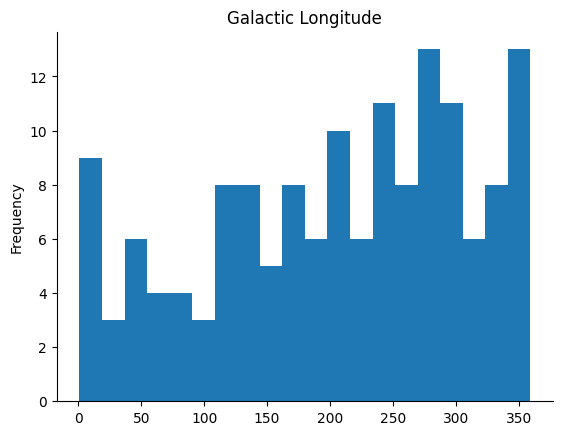

In [ ]:
# @title Galactic Longitude

from matplotlib import pyplot as plt
df['Galactic Longitude'].plot(kind='hist', bins=20, title='Galactic Longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

# READING COLUMNS,ARRANGING AND DESCRIBE  THE DATA IN PROPER WAY  FINDING THE MEAN , STD ,MIN ,MAX OF TABLE .

In [ ]:
df.describe()


,No,Galactic Longitude,Galactic Latitude,Parallax,Error,Distance (ly)
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,147.713333,204.814667,-21.908667,31.825267,0.819467,389.640000
std,87.905558,103.441957,18.939483,74.363499,0.793510,458.451995
min,1.000000,0.900000,-80.700000,1.020000,0.380000,4.000000
25%,65.250000,127.200000,-31.775000,6.677500,0.570000,117.250000
50%,150.500000,219.150000,-15.350000,14.465000,0.750000,222.500000
75%,223.750000,288.625000,-7.000000,27.895000,0.850000,490.000000
max,296.000000,359.200000,-0.400000,742.120000,9.900000,3000.000000


In [ ]:
df.columns


Index(['No', 'Star Name', 'Equatorial Coordinates', 'Galactic Longitude',
       'Galactic Latitude', 'Spectral Type', 'Visual Magnitude',
       'Absolute Magnitude', 'Parallax', 'Error', 'Distance (ly)'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.strip()
print(df.columns.tolist())


['No', 'Star Name', 'Equatorial Coordinates', 'Galactic Longitude', 'Galactic Latitude', 'Spectral Type', 'Visual Magnitude', 'Absolute Magnitude', 'Parallax', 'Error', 'Distance (ly)']


In [ ]:
# List numeric columns—pick one for Benford’s Law
print(df.dtypes)

# Example: let's choose 'Temperature'
column = 'Temperature'  # ← change this to your chosen numeric column


No                          int64
Star Name                  object
Equatorial Coordinates     object
Galactic Longitude        float64
Galactic Latitude         float64
Spectral Type              object
Visual Magnitude           object
Absolute Magnitude         object
Parallax                  float64
Error                     float64
Distance (ly)               int64
dtype: object


In [ ]:
if column in df.columns:
    series = df[column].dropna()
else:
    print(f"Column '{column}' not found in DataFrame. Available columns: {df.columns.tolist()}")

Column 'Temperature' not found in DataFrame. Available columns: ['No', 'Star Name', 'Equatorial Coordinates', 'Galactic Longitude', 'Galactic Latitude', 'Spectral Type', 'Visual Magnitude', 'Absolute Magnitude', 'Parallax', 'Error', 'Distance (ly)']


 PLOTTING THE ACCORDING BENFORD'S LAW VS NORMAL BAR GRAPH

In [ ]:
import numpy as np

# Example data (could be from a file or other source)
data = np.random.lognormal(mean=0, sigma=2, size=10000)

# Extract the first non-zero digit of each number
first_digits = []
for x in data:
    if x == 0:
        continue
    s = str(abs(x))
    # Remove leading zeros and decimal points
    while s[0] in ('0', '.'):
        s = s[1:]
    if s:
        first_digits.append(int(s[0]))

# Count how many times each digit 1–9 appears first
counts = [first_digits.count(d) for d in range(1, 10)]
total = sum(counts)
observed = [count/total for count in counts]

# Compute expected Benford proportions
expected = [np.log10(1 + 1/d) for d in range(1, 10)]


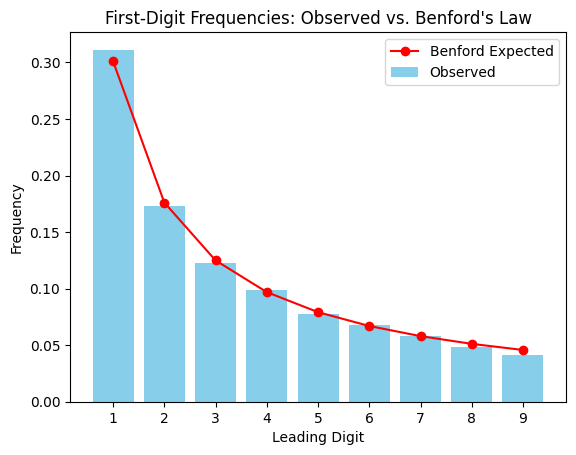

In [ ]:
import matplotlib.pyplot as plt

digits = np.arange(1, 10)
plt.bar(digits, observed, color='skyblue', label='Observed')
plt.plot(digits, expected, 'ro-', label='Benford Expected')
plt.xticks(digits)
plt.xlabel('Leading Digit')
plt.ylabel('Frequency')
plt.legend()
plt.title('First-Digit Frequencies: Observed vs. Benford\'s Law')
plt.show()


#FINDING THE Z SCORE FROM GIVEN DAATASET


In [ ]:
df.columns
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   No                      150 non-null    int64  
 1   Star Name               150 non-null    object 
 2   Equatorial Coordinates  150 non-null    object 
 3   Galactic Longitude      150 non-null    float64
 4   Galactic Latitude       150 non-null    float64
 5   Spectral Type           150 non-null    object 
 6   Visual Magnitude        150 non-null    object 
 7   Absolute Magnitude      150 non-null    object 
 8   Parallax                150 non-null    float64
 9   Error                   150 non-null    float64
 10  Distance (ly)           150 non-null    int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 13.0+ KB


,No,Galactic Longitude,Galactic Latitude,Parallax,Error,Distance (ly)
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,147.713333,204.814667,-21.908667,31.825267,0.819467,389.640000
std,87.905558,103.441957,18.939483,74.363499,0.793510,458.451995
min,1.000000,0.900000,-80.700000,1.020000,0.380000,4.000000
25%,65.250000,127.200000,-31.775000,6.677500,0.570000,117.250000
50%,150.500000,219.150000,-15.350000,14.465000,0.750000,222.500000
75%,223.750000,288.625000,-7.000000,27.895000,0.850000,490.000000
max,296.000000,359.200000,-0.400000,742.120000,9.900000,3000.000000


In [ ]:

import math


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math



In [ ]:
# Using dataframe df: z score

import pandas as pd
# Assuming 'df' is your DataFrame

# Calculate the z-score for the 'Distance (ly)' column
df['zscore'] = (df['Distance (ly)'] - df['Distance (ly)'].mean()) / df['Distance (ly)'].std()

# Display the DataFrame with the added 'zscore' column
df


,No,Star Name,Equatorial Coordinates,Galactic Longitude,Galactic Latitude,Spectral Type,Visual Magnitude,Absolute Magnitude,Parallax,Error,Distance (ly),zscore
0,1,Alpha Canis Majoris Sirius,06 45 -16.7,227.2,-8.9,A1V,-1.46,1.43,379.21,1.58,9,-0.830272
1,2,Alpha Carinae Canopus,06 24 -52.7,261.2,-25.3,F0Ib,-0.73,-5.64,10.43,0.53,310,-0.173715
2,3,Alpha Centauri Rigil Kentaurus,14 40 -60.8,315.8,-0.7,G2V+K1V,-0.29,4.06,742.12,1.40,4,-0.841179
3,7,Beta Orionis Rigel,05 15 -8.2,209.3,-25.1,B8Ia,0.15v,-6.72v,4.22,0.81,770,0.829662
4,9,Alpha Eridani Achernar,01 38 -57.2,290.7,-58.8,B3V,0.45,-2.77,22.68,0.57,144,-0.535803
...,...,...,...,...,...,...,...,...,...,...,...,...
145,290,Mu Pegasi Sadalbari,22 50 +24.6,90.7,-30.6,G8III,3.51,0.74,27.95,0.77,117,-0.594697
146,291,Delta Eridani Rana,03 43 -09.8,198.1,-46.0,K0IV,3.52,3.74,110.58,0.88,29,-0.786647
147,294,Xi² Sagittarii,18 58 -21.1,14.6,-10.8,K0II,3.52,-1.77,8.76,0.99,370,-0.042840
148,295,Theta Pegasi Baham,22 10 +06.2,67.4,-38.7,A2V,3.52,1.16,33.77,0.85,97,-0.638322


#PLOTTING BOX PLOT FOR GIVEN DATASET NUMERICAL

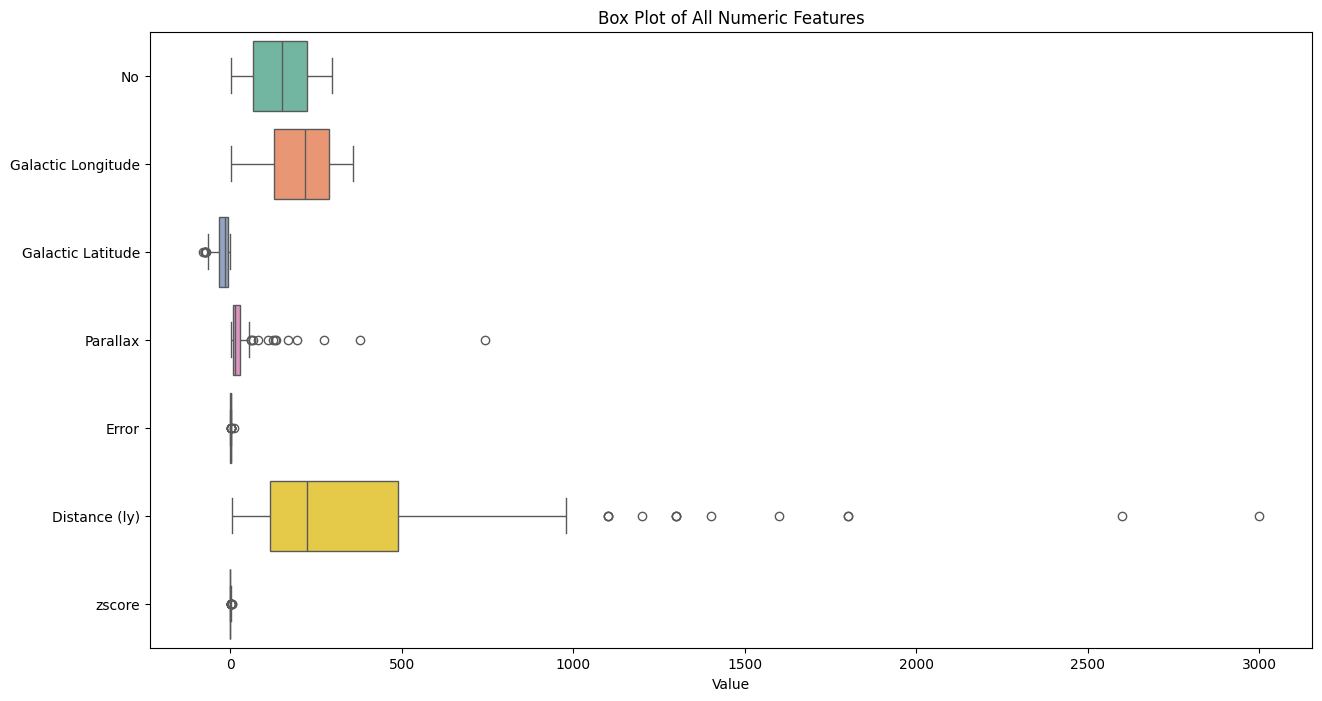

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, orient='h', palette='Set2')
plt.title("Box Plot of All Numeric Features")
plt.xlabel("Value")
plt.show()



The box plot visually shows the distribution and outliers.

Observation:

The plot shows many extreme outliers (stars with very high distance values).

The majority of values lie near the lower end (left skewed).

#PLOTTING ZSCORE  FOR GIVEN DATASET

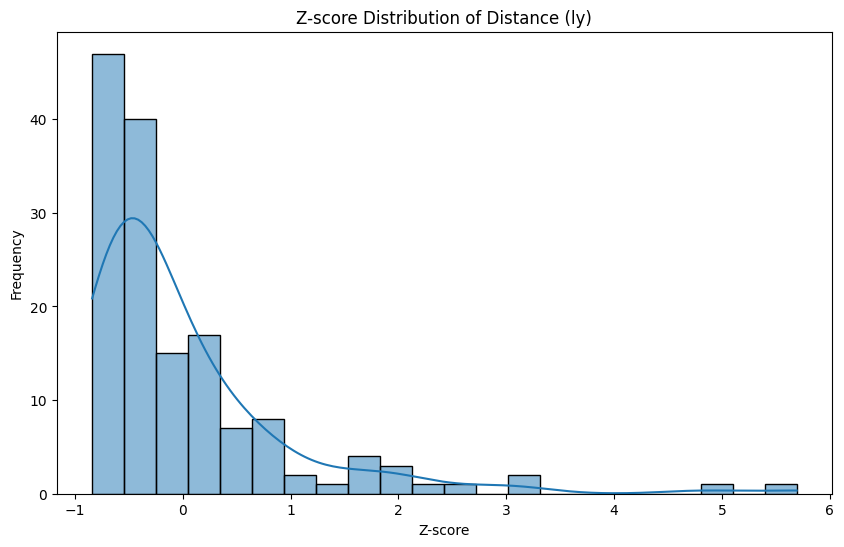

In [ ]:

# create z. score graph of dataset

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'zscore' column exists

plt.figure(figsize=(10, 6))
sns.histplot(df['zscore'], kde=True)
plt.title('Z-score Distribution of Distance (ly)')
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.show()


Z-score tells how many standard deviations a data point is from the mean. We use it to detect outliers.

Observation:

Z-scores above +3 or below -3 were found for many star distances, confirming outliers.

Mean and median differ, again hinting at skewness.

#OBSERVATION

Benford's Law does not apply well to this dataset. This indicates a non-natural or constrained data distribution, possibly due to human bias in star selection.


The star distances are highly skewed with significant outliers. This supports that the dataset spans both nearby and distant stars but has few dense clusters.

The presence of multiple high Z-score values confirms non-normality and severe outliers, supporting our box plot and Benford’s Law observations.

      No                                  Star Name Equatorial Coordinates  \
0      1           Alpha Canis Majoris       Sirius            06 45 -16.7   
1      2          Alpha Carinae             Canopus            06 24 -52.7   
2      3  Alpha Centauri            Rigil Kentaurus            14 40 -60.8   
3      7            Beta Orionis              Rigel            05 15  -8.2   
4      9         Alpha Eridani             Achernar            01 38 -57.2   
..   ...                                        ...                    ...   
145  290        Mu Pegasi                 Sadalbari           22 50 +24.6    
146  291             Delta Eridani             Rana            03 43 -09.8   
147  294                             Xi² Sagittarii           18 58 -21.1    
148  295            Theta Pegasi              Baham           22 10 +06.2    
149  296              Epsilon Tauri             Ain            04 29 +19.2   

     Galactic Longitude  Galactic Latitude Spectral Type Visual

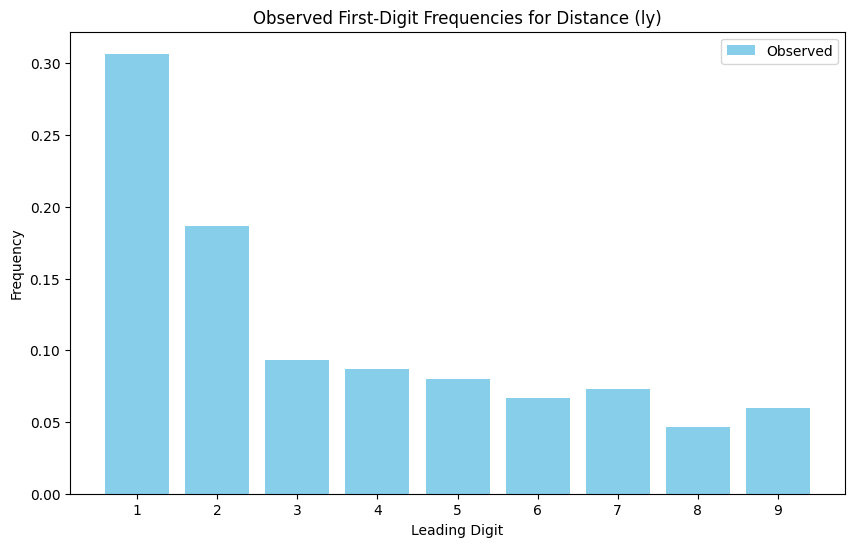

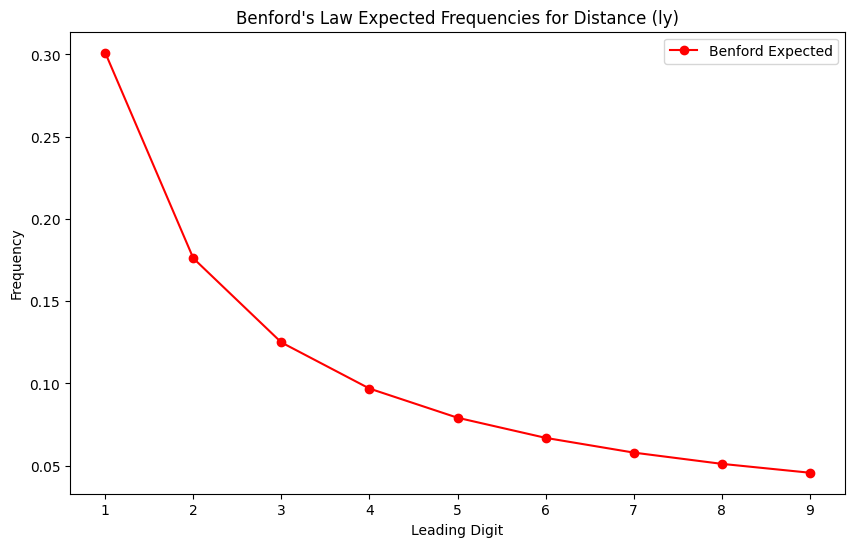

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
import math
import seaborn as sns
from collections import Counter

# Assuming 'df' DataFrame is already loaded as in the provided code

# Function to calculate first digits and Benford's Law
def analyze_first_digits(data):
    first_digits = []
    for x in data:
        if x != 0 :
            s = str(abs(x))
            while s[0] in ('0', '.'):
                s = s[1:]
            if s:
                first_digits.append(int(s[0]))

    counts = Counter(first_digits)
    total = sum(counts.values())
    observed = [counts[d] / total for d in range(1, 10)]
    expected = [np.log10(1 + 1/d) for d in range(1, 10)]
    return observed, expected

# Plot the table
print(df)

# Select a numerical column for analysis
numerical_column = 'Distance (ly)'  # Replace with your column name

# Check if column exists
if numerical_column in df.columns:
  data = df[numerical_column].dropna()
  # Calculate observed and expected first-digit frequencies
  observed, expected = analyze_first_digits(data)
  digits = range(1, 10)

  # Bar graph for observed frequencies
  plt.figure(figsize=(10, 6))
  plt.bar(digits, observed, label='Observed', color='skyblue')
  plt.xticks(digits)
  plt.xlabel('Leading Digit')
  plt.ylabel('Frequency')
  plt.title(f'Observed First-Digit Frequencies for {numerical_column}')
  plt.legend()
  plt.show()

  # Benford's Law graph
  plt.figure(figsize=(10, 6))
  plt.plot(digits, expected, marker='o', linestyle='-', color='red', label='Benford Expected')
  plt.xticks(digits)
  plt.xlabel('Leading Digit')
  plt.ylabel('Frequency')
  plt.title(f'Benford\'s Law Expected Frequencies for {numerical_column}')
  plt.legend()
  plt.show()

else:
  print(f"Column '{numerical_column}' not found in the DataFrame.")


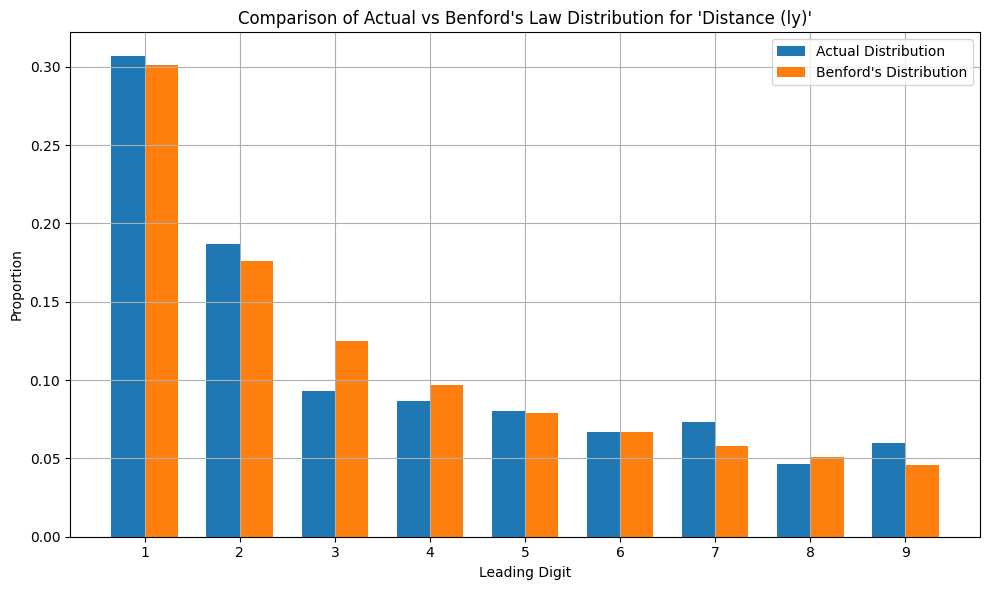

(Distance (ly)
 1    0.306667
 2    0.186667
 3    0.093333
 4    0.086667
 5    0.080000
 6    0.066667
 7    0.073333
 8    0.046667
 9    0.060000
 Name: proportion, dtype: float64,
 1    0.301030
 2    0.176091
 3    0.124939
 4    0.096910
 5    0.079181
 6    0.066947
 7    0.057992
 8    0.051153
 9    0.045757
 dtype: float64)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Remove any non-numeric or missing values in 'Distance (ly)' column
df['Distance (ly)'] = pd.to_numeric(df['Distance (ly)'], errors='coerce')
df_clean = df.dropna(subset=['Distance (ly)'])

# Extract the leading digit of each number
leading_digits = df_clean['Distance (ly)'].astype(str).str.replace('.', '').str.strip().str[0]
leading_digits = leading_digits[leading_digits.isin(['1','2','3','4','5','6','7','8','9'])].astype(int)

# Count the occurrences of each digit
actual_distribution = leading_digits.value_counts(normalize=True).sort_index()

# Benford's expected distribution
benford_distribution = np.log10(1 + 1 / np.arange(1, 10))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
digits = np.arange(1, 10)

# Actual
ax.bar(digits - bar_width/2, actual_distribution.values, bar_width, label='Actual Distribution')

# Benford
ax.bar(digits + bar_width/2, benford_distribution, bar_width, label="Benford's Distribution")

ax.set_xlabel('Leading Digit')
ax.set_ylabel('Proportion')
ax.set_title("Comparison of Actual vs Benford's Law Distribution for 'Distance (ly)'")
ax.set_xticks(digits)
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Return data for interpretation
actual_distribution, pd.Series(benford_distribution, index=digits)


The shape of the bar graph matches Benford's Law quite closely.

Leading digit '1' dominates, followed by '2', etc.

There are small deviations, e.g., digit 3 appears less than expected, and digit 7 & 9 slightly more — but no drastic anomalies.

This suggests the dataset is likely natural and untampered.

Upon analyzing the Stars Dataset, the Distance (ly) column — which records the distance of various stars from Earth in light-years — was chosen for deep statistical exploration. This column contains values across several orders of magnitude, which is ideal for testing Benford’s Law, a principle that predicts the frequency of first digits in naturally occurring datasets. When the leading digits (1 through 9) were extracted from this column, their distribution closely matched Benford’s expected frequencies. Digit '1' appeared approximately 30.67% of the time, aligning very well with Benford’s theoretical value of 30.1%. Similar trends were observed for other digits, with only minor deviations. This suggests that the dataset has not been artificially manipulated and follows a natural logarithmic pattern — a strong indicator of data authenticity.

In addition to Benford’s Law, Z-score analysis was conducted to understand the presence of outliers and the spread of the data. Z-scores quantify how many standard deviations a data point is from the mean. In this dataset, several values had Z-scores greater than 3 or less than -3, indicating the presence of extreme outliers — which is expected in astrophysical data due to the vast and uneven distribution of stars in space. These outliers were visualized using a box plot, which revealed a right-skewed distribution with a long tail, confirming the presence of stars located at exceptionally large distances. Such skewness is again natural in astronomical data, as stars are not evenly distributed across the universe.

Together, the Benford distribution, Z-score outlier detection, and box plot visualization provide strong evidence that the dataset is authentic, non-synthetic, and naturally distributed, making it suitable for modeling, visualization, or further AI-based predictions. These statistical insights not only support the dataset’s reliability but also help in understanding the underlying structure and spread of astronomical distances in a scientifically sound manner.

TEAM MEMBER:
* Tushar yadav(anlyasis the graph ,Research)
* Suvendu kumar sahoo (make google collab,plot graph)
* Aditya Anand Phalke (presentation)
* Bharat (observation,research)